In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pickle
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

from keras.optimizers import Adam
from keras import applications
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

# this function is used to update the plots for each epoch and error
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()
import joblib

In [2]:

x_train=joblib.load('X_train80.joblib')

In [6]:
import joblib
y_train=joblib.load('Y_train80.joblib')
x_test=joblib.load('X_test20.joblib')
y_test=joblib.load('Y_test20.joblib')

In [4]:
y_train.shape

(1376,)

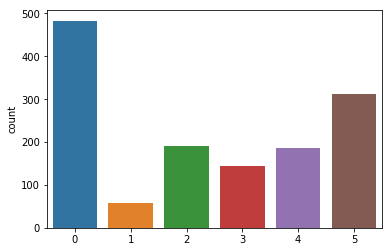

In [5]:
sns.countplot(y_train)

In [6]:
y_train

array([5, 0, 0, ..., 5, 3, 4])

In [7]:
num_classes=6

x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (1376, 224, 224, 3)
1376 train samples
344 test samples


In [8]:

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
from keras import applications
vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(224, 224, 3))

# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

# Stacking a new simple convolutional network on top of it    
x = Conv2D(512, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model = Model(input=vgg_model.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:6]:
    layer.trainable = False

# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',
                     metrics=['accuracy'])

C:\Users\santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [10]:
history=custom_model.fit(x_train, y_train, batch_size=10, epochs=3, verbose=1, validation_split=0.3)

Train on 963 samples, validate on 413 samples
Epoch 1/3
963/963 [==============================] - ETA: 26:45 - loss: 12.9730 - acc: 0.0000e+0 - ETA: 18:54 - loss: 12.9338 - acc: 0.1000    - ETA: 15:54 - loss: 11.3088 - acc: 0.233 - ETA: 14:17 - loss: 11.3023 - acc: 0.250 - ETA: 13:17 - loss: 11.2984 - acc: 0.260 - ETA: 12:39 - loss: 11.2958 - acc: 0.266 - ETA: 12:18 - loss: 11.0636 - acc: 0.285 - ETA: 11:59 - loss: 11.0193 - acc: 0.287 - ETA: 11:44 - loss: 11.0486 - acc: 0.288 - ETA: 11:23 - loss: 10.7496 - acc: 0.310 - ETA: 11:03 - loss: 10.7981 - acc: 0.309 - ETA: 10:47 - loss: 10.4355 - acc: 0.333 - ETA: 10:37 - loss: 10.5007 - acc: 0.330 - ETA: 10:26 - loss: 10.5565 - acc: 0.328 - ETA: 10:13 - loss: 10.1751 - acc: 0.353 - ETA: 10:05 - loss: 10.3451 - acc: 0.343 - ETA: 9:54 - loss: 10.2106 - acc: 0.352 - ETA: 9:45 - loss: 10.2702 - acc: 0.35 - ETA: 9:36 - loss: 10.3235 - acc: 0.34 - ETA: 9:24 - loss: 10.3714 - acc: 0.34 - ETA: 9:16 - loss: 10.5683 - acc: 0.33 - ETA: 9:06 - loss: 10

In [12]:
score=custom_model.evaluate(x_test,y_test)


Test score: 10.26122929329096
Test accuracy: 0.36337209371633306


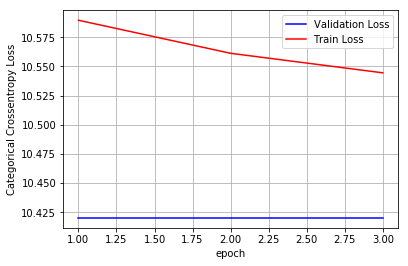

In [13]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,3+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

In [25]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pickle
from sklearn.model_selection import train_test_split
import keras

DATADIR ="C:/Users/santosh/Desktop/major/dataset/Kicks"

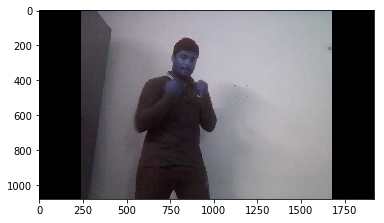

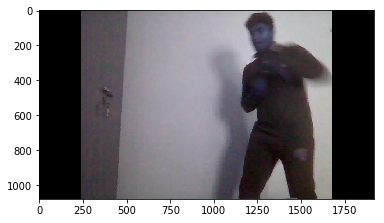

In [28]:
CATEGORIES=['Left','Right']
for category in CATEGORIES:
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):# iterate over each image
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
            plt.imshow(img_array, cmap='gray')  # graph it
            plt.show()  # display!

            break 


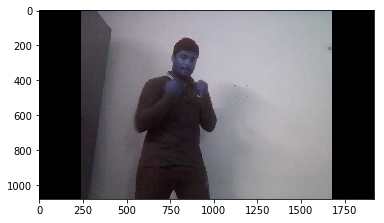

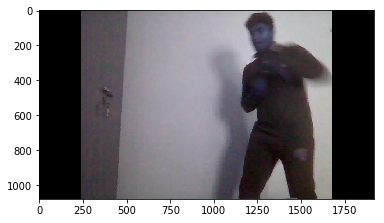

In [29]:
DATADIR ="C:/Users/santosh/Desktop/major/dataset/Punches"
CATEGORIES=['Left','Right']
for category in CATEGORIES:
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):# iterate over each image
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
            plt.imshow(img_array, cmap='gray')  # graph it
            plt.show()  # display!

            break 
    

## Custom Model

In [14]:
# dimensions of our images.
img_width, img_height = 224,224

epochs = 5
batch_size = 28

In [15]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
history=model.fit(x_train, y_train, batch_size=28, epochs=25, verbose=1, validation_split=0.3)

Train on 963 samples, validate on 413 samples
Epoch 1/25
963/963 [==============================] - ETA: 4:32 - loss: 1.8017 - acc: 0.142 - ETA: 4:05 - loss: 3.0193 - acc: 0.160 - ETA: 3:56 - loss: 2.5746 - acc: 0.261 - ETA: 3:54 - loss: 2.3655 - acc: 0.267 - ETA: 3:48 - loss: 2.2311 - acc: 0.250 - ETA: 3:40 - loss: 2.1424 - acc: 0.238 - ETA: 3:32 - loss: 2.0607 - acc: 0.239 - ETA: 3:25 - loss: 2.0552 - acc: 0.241 - ETA: 3:17 - loss: 1.9935 - acc: 0.257 - ETA: 3:10 - loss: 1.9741 - acc: 0.260 - ETA: 3:02 - loss: 1.9587 - acc: 0.269 - ETA: 2:55 - loss: 1.9383 - acc: 0.270 - ETA: 2:47 - loss: 1.9234 - acc: 0.280 - ETA: 2:40 - loss: 1.9092 - acc: 0.283 - ETA: 2:32 - loss: 1.8932 - acc: 0.297 - ETA: 2:24 - loss: 1.8775 - acc: 0.303 - ETA: 2:17 - loss: 1.8653 - acc: 0.308 - ETA: 2:09 - loss: 1.8623 - acc: 0.305 - ETA: 2:01 - loss: 1.8629 - acc: 0.304 - ETA: 1:53 - loss: 1.8451 - acc: 0.314 - ETA: 1:45 - loss: 1.8412 - acc: 0.311 - ETA: 1:38 - loss: 1.8329 - acc: 0.308 - ETA: 1:30 - loss: 1.

963/963 [==============================] - ETA: 8:15 - loss: 0.2002 - acc: 0.928 - ETA: 7:24 - loss: 0.2534 - acc: 0.875 - ETA: 7:22 - loss: 0.2672 - acc: 0.869 - ETA: 7:09 - loss: 0.2106 - acc: 0.901 - ETA: 6:54 - loss: 0.1924 - acc: 0.914 - ETA: 6:39 - loss: 0.1790 - acc: 0.922 - ETA: 6:24 - loss: 0.1708 - acc: 0.928 - ETA: 6:10 - loss: 0.1679 - acc: 0.933 - ETA: 5:56 - loss: 0.1795 - acc: 0.924 - ETA: 5:43 - loss: 0.1847 - acc: 0.917 - ETA: 5:26 - loss: 0.1799 - acc: 0.918 - ETA: 5:09 - loss: 0.1832 - acc: 0.913 - ETA: 4:55 - loss: 0.1928 - acc: 0.903 - ETA: 4:40 - loss: 0.1923 - acc: 0.908 - ETA: 4:25 - loss: 0.1996 - acc: 0.907 - ETA: 4:09 - loss: 0.2058 - acc: 0.906 - ETA: 3:55 - loss: 0.2001 - acc: 0.911 - ETA: 3:41 - loss: 0.1938 - acc: 0.914 - ETA: 3:26 - loss: 0.1852 - acc: 0.919 - ETA: 3:12 - loss: 0.1862 - acc: 0.917 - ETA: 2:58 - loss: 0.1910 - acc: 0.916 - ETA: 2:45 - loss: 0.2013 - acc: 0.910 - ETA: 2:31 - loss: 0.2044 - acc: 0.909 - ETA: 2:18 - loss: 0.2024 - acc: 0.912

963/963 [==============================] - ETA: 4:19 - loss: 0.2861 - acc: 0.928 - ETA: 4:15 - loss: 0.2680 - acc: 0.910 - ETA: 4:14 - loss: 0.2170 - acc: 0.928 - ETA: 4:07 - loss: 0.1844 - acc: 0.928 - ETA: 4:00 - loss: 0.1862 - acc: 0.935 - ETA: 3:51 - loss: 0.1646 - acc: 0.940 - ETA: 3:45 - loss: 0.1489 - acc: 0.943 - ETA: 3:36 - loss: 0.1442 - acc: 0.942 - ETA: 3:28 - loss: 0.1380 - acc: 0.944 - ETA: 3:19 - loss: 0.1333 - acc: 0.942 - ETA: 3:11 - loss: 0.1225 - acc: 0.948 - ETA: 3:03 - loss: 0.1179 - acc: 0.949 - ETA: 2:54 - loss: 0.1102 - acc: 0.953 - ETA: 2:45 - loss: 0.1081 - acc: 0.956 - ETA: 2:38 - loss: 0.1105 - acc: 0.954 - ETA: 2:30 - loss: 0.1140 - acc: 0.953 - ETA: 2:22 - loss: 0.1161 - acc: 0.949 - ETA: 2:14 - loss: 0.1167 - acc: 0.946 - ETA: 2:06 - loss: 0.1182 - acc: 0.945 - ETA: 1:57 - loss: 0.1165 - acc: 0.946 - ETA: 1:49 - loss: 0.1167 - acc: 0.945 - ETA: 1:41 - loss: 0.1129 - acc: 0.948 - ETA: 1:33 - loss: 0.1150 - acc: 0.947 - ETA: 1:25 - loss: 0.1136 - acc: 0.949

In [17]:
score=model.evaluate(x_test,y_test)


344/344 [==============================] - ETA: 24 - ETA: 24 - ETA: 21 - ETA: 18 - ETA: 16 - ETA: 13 - ETA: 10 - ETA: 7 - ETA:  - ETA:  - 31s 91ms/step


Test score: 0.04440727198583096
Test accuracy: 0.9738372093023255


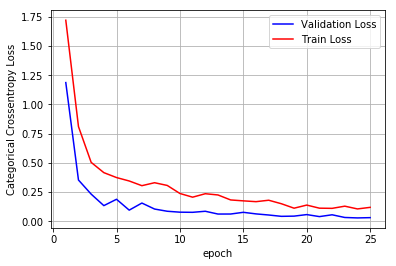

In [20]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,25+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

In [21]:
model.save('final.model')

In [4]:
model=tf.keras.models.load_model('final.model')

In [3]:
from sklearn.metrics import f1_score,confusion_matrix

In [7]:
pred=model.predict(x_test)
pred=np.argmax(pred,axis=1)

In [8]:
print(f1_score(y_test,pred,average='macro'))

0.9425479604984659


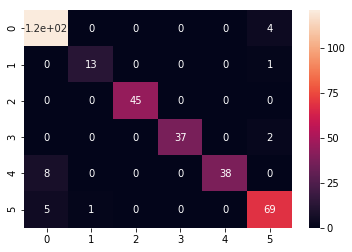

In [10]:
c=confusion_matrix(y_test,pred)
sns.heatmap(c,annot=True)
